In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

target=pd.read_csv('./train_scores.csv')

In [2]:
target

,isFraud,iforest,lof,iforest+lof_u,iforest+lof_i,hdbscan,mahalanobis,iforest scores,lof scores,hdbscan scores,mahalanobis scores
0,0,1,1,0.0,0.0,0.0,0.0,-0.391002,-0.997672,0.015392,0.068867
1,0,1,1,0.0,0.0,0.0,0.0,-0.299100,-1.008481,0.013761,0.011401
2,0,1,1,0.0,0.0,0.0,0.0,-0.299100,-1.207288,0.003123,0.011401
3,0,-1,1,-1.0,0.0,0.0,0.0,-0.642361,-1.085168,0.007088,1.166482
4,0,1,1,0.0,0.0,0.0,0.0,-0.299100,-1.089259,0.091146,0.011401
...,...,...,...,...,...,...,...,...,...,...,...
590535,0,1,-1,-1.0,0.0,-1.0,0.0,-0.303563,-2.675082,0.807587,0.010451
590536,0,1,1,0.0,0.0,0.0,0.0,-0.299100,-1.407753,0.059276,0.011401
590537,0,1,1,0.0,0.0,0.0,0.0,-0.299100,-1.157963,0.023822,0.011401
590538,0,-1,1,-1.0,0.0,0.0,0.0,-0.699328,-1.103259,0.203412,4.066957


In [5]:
## hdbscan 이랑 iforest는 이상치가 거의 안 겹치는 것처럼 보임 
## 마할라노비스는 아이솔레이션 포레스트랑 어느 정도 겹쳐보임
## lof와 hdbscan이 유사해 보임 

In [4]:
target.replace({'iforest':1},{'iforest':0},inplace=True)
target.replace({'lof':1},{'lof':0},inplace=True)

In [91]:
union=np.zeros(target.shape[0])
for i in range(target.shape[0]):

    batch=target.iloc[i,1:6]
    union[i]=batch[np.argmin(batch)]

pd.crosstab(union,target['isFraud'])

isFraud,0,1
row_0,,
-1.0,119599,7295
0.0,450278,13368


In [8]:
temp=np.zeros(target.shape[0])
an_iforest=target.loc[target['iforest']==-1]
an_lof=target.loc[(target['iforest']==0)&(target['lof']==-1)]
for i in range(target.shape[0]):
    if i in an_iforest.index or i in an_lof.index:
        temp[i]=-1
pd.crosstab(temp,target['isFraud'])    

isFraud,0,1
row_0,,
-1.0,90842,6179
0.0,479035,14484


In [22]:
temp2=np.zeros(target.shape[0])
an_iforest=target.loc[target['iforest']==-1]
an_lof=target.loc[(target['iforest']==0)&(target['hdbscan']==-1)]
for i in range(target.shape[0]):
    if i in an_iforest.index or i in an_lof.index:
        temp2[i]=-1
pd.crosstab(temp2,target['isFraud'])    

isFraud,0,1
row_0,,
-1.0,114666,7578
0.0,455211,13085


In [9]:
temp2=np.zeros(target.shape[0])
an_iforest=target.loc[target['iforest']]
an_lof=target.loc[(target['iforest']==0)&(target['lof']==-1)&(target['hdbscan']==-1)]
for i in range(target.shape[0]):
    if i in an_iforest.index or i in an_lof.index:
        temp2[i]=-1
pd.crosstab(temp2,target['isFraud'])    

isFraud,0,1
row_0,,
-1.0,58025,4593
0.0,511852,16070


In [26]:
temp2=np.zeros(target.shape[0])
an_iforest=target.loc[target['iforest']==-1]
an_lof=target.loc[(target['iforest scores']<-0.4)&(target['lof']==-1)&(target['hdbscan']==-1)]
for i in range(target.shape[0]):
    if i in an_iforest.index or i in an_lof.index:
        temp2[i]=-1
pd.crosstab(temp2,target['isFraud'])    

isFraud,0,1
row_0,,
-1.0,37656,3615
0.0,532221,17048


In [29]:
temp2=np.zeros(target.shape[0])
an_iforest=target.loc[target['iforest']==-1]
an_lof=target.loc[(target['iforest scores']<-0.3)&(target['lof']==-1)&(target['hdbscan']==-1)]
for i in range(target.shape[0]):
    if i in an_iforest.index or i in an_lof.index:
        temp2[i]=-1
pd.crosstab(temp2,target['isFraud'])    

isFraud,0,1
row_0,,
-1.0,55901,4456
0.0,513976,16207


In [10]:
## 도저히 모르겠다 그냥 다 머신러닝에 또 돌려보자!
## 근데 쓸 수 있는 기법이 비지도 학습 뿐! 따라서 클러스팅... 망할놈의 클러스팅! 

<AxesSubplot:>

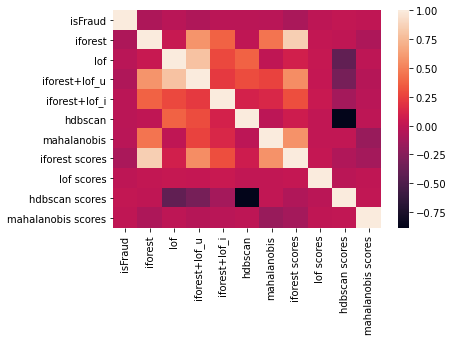

In [92]:
import seaborn as sns
sns.heatmap(target.corr())

In [32]:
target.columns

Index(['isFraud', 'iforest', 'lof', 'iforest+lof_u', 'iforest+lof_i',
       'hdbscan', 'mahalanobis', 'iforest scores', 'lof scores',
       'hdbscan scores', 'mahalanobis scores'],
      dtype='object')

In [40]:
from pycaret.classification import * 

matrix=setup(target[['isFraud','iforest scores', 'lof scores',
       'hdbscan scores', 'mahalanobis scores']],target='isFraud')

,Description,Value
0,session_id,1857
1,Target,isFraud
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(590540, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

IntProgress(value=0, description='Processing: ', max=69)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:08:27
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Naive Bayes


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9650,0.5767,0.0000,0.0000,0.0000,0.0000,0.0000,2.1080
knn,K Neighbors Classifier,0.9640,0.5452,0.0057,0.1346,0.0110,0.0082,0.0210,1.3120


In [ ]:
+